In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import premise
premise.__file__

'/Users/romain/GitHub/premise/premise/__init__.py'

In [1]:
from premise import *
import brightway2 as bw
bw.projects.set_current("premise")

In [6]:
args = {
    "range time": 5,
    "duration": 2,
    "foresight": False,
    "lead time": 0,
    "capital replacement rate": True,
    "measurement": 4
}

In [7]:
ndb = NewDatabase(
    scenarios = [
        {"model":"image", "pathway":"SSP2-RCP26", "year":2055,},
        #{"model":"image", "pathway":"SSP2-RCP26", "year":2040,},
        #{"model":"image", "pathway":"SSP2-RCP19", "year":2040,},
    ],        
    source_db="ecoinvent 3.8 cutoff",
    source_version="3.8",
    key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
    system_model="consequential",
    system_args=args
)

+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+

////////////////////// EXTRACTING SOURCE DATABASE //////////////////
Done!

//////////////////// IMPOR

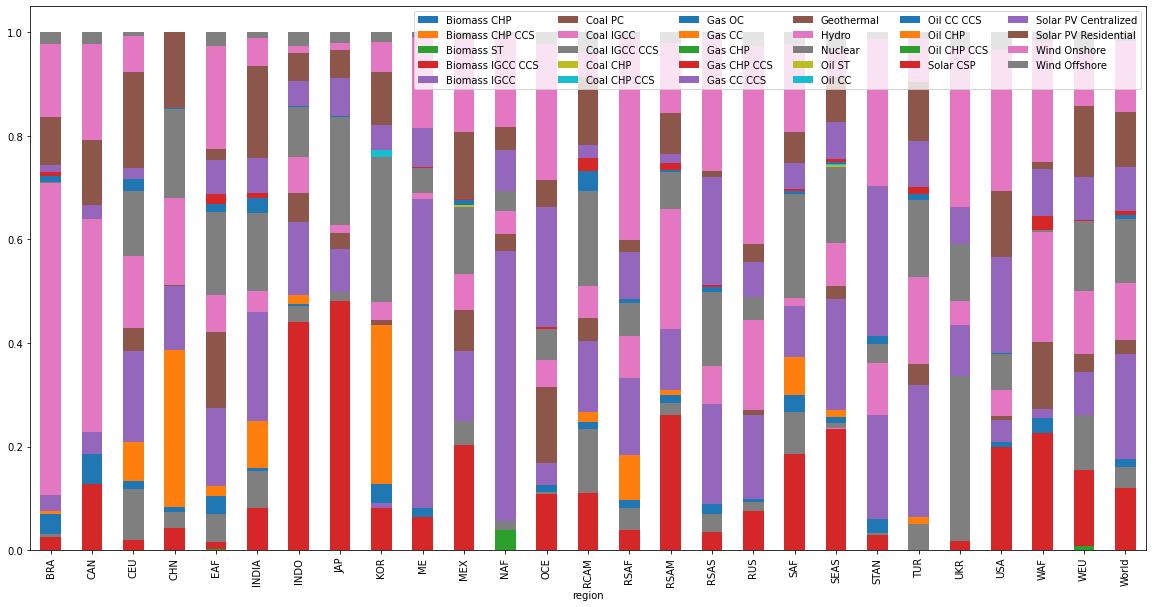

In [52]:
import matplotlib.pyplot as plt
(
    ndb.iam_data.electricity_markets.to_dataframe("val")["val"]
    .groupby(["region","variables"]).sum().unstack()
).plot(kind="bar", stacked=True, figsize=(20, 10))
plt.legend(ncol=6)